In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from pathlib import Path
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from sklearn.preprocessing import StandardScaler


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from pathlib import Path
from sklearn.metrics import (roc_curve, auc, accuracy_score)

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

from statistics import mean
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [2]:
path = Path(r'C:\Users\tsuka\Desktop\csv')
path = Path(r'C:\Users\SI\Python_ML\NLTK_\csv')
path = Path(r'C:\Users\SI\Python_ML\NLTK_\nltk')

path
path.glob('*.csv')
list(path.glob('*.csv'))
#print('lists:', path.glob('*'))
#list path
path = list(path.glob('*.csv'))
print(path)
#data = pd.read_csv(path[0], delimiter=';')
data = pd.read_csv(path[3])
path
#data_val = pd.read_csv(path[1])
#data_val

[WindowsPath('C:/Users/SI/Python_ML/NLTK_/nltk/to_csv_out.csv'), WindowsPath('C:/Users/SI/Python_ML/NLTK_/nltk/to_csv_out_nor.csv'), WindowsPath('C:/Users/SI/Python_ML/NLTK_/nltk/to_csv_out_original.csv'), WindowsPath('C:/Users/SI/Python_ML/NLTK_/nltk/to_csv_out_percentage.csv'), WindowsPath('C:/Users/SI/Python_ML/NLTK_/nltk/to_csv_out_std.csv')]


[WindowsPath('C:/Users/SI/Python_ML/NLTK_/nltk/to_csv_out.csv'),
 WindowsPath('C:/Users/SI/Python_ML/NLTK_/nltk/to_csv_out_nor.csv'),
 WindowsPath('C:/Users/SI/Python_ML/NLTK_/nltk/to_csv_out_original.csv'),
 WindowsPath('C:/Users/SI/Python_ML/NLTK_/nltk/to_csv_out_percentage.csv'),
 WindowsPath('C:/Users/SI/Python_ML/NLTK_/nltk/to_csv_out_std.csv')]

In [3]:
data.info()
datanp = data.values
datanp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
Unnamed: 0    18 non-null int64
and           18 non-null float64
the           18 non-null float64
that          18 non-null float64
of            18 non-null float64
was           18 non-null float64
upon          18 non-null float64
not           18 non-null float64
when          18 non-null float64
then          18 non-null float64
total         18 non-null float64
dtypes: float64(10), int64(1)
memory usage: 1.6 KB


array([[0.00000000e+00, 2.42793371e-02, 2.51731826e-02, 8.99042234e-03,
        2.22370042e-02, 1.23943106e-02, 6.91171197e-04, 1.09184262e-02,
        1.62139409e-03, 7.79516388e-04, 1.00000000e+00],
       [1.00000000e+00, 2.79002964e-02, 3.17812796e-02, 8.68892035e-03,
        2.61176926e-02, 1.35477891e-02, 6.51923684e-04, 9.43252081e-03,
        1.99651628e-03, 6.11178454e-04, 1.00000000e+00],
       [2.00000000e+00, 2.36622026e-02, 2.72715715e-02, 9.16115726e-03,
        2.51808216e-02, 1.30389332e-02, 6.21574278e-04, 8.56077301e-03,
        1.84353280e-03, 8.89981353e-04, 1.00000000e+00],
       [3.00000000e+00, 3.84374870e-02, 6.14483295e-02, 1.24434277e-02,
        3.41165226e-02, 4.46740427e-03, 2.70122119e-03, 6.48392031e-03,
        2.45880390e-03, 7.86619357e-04, 1.00000000e+00],
       [4.00000000e+00, 2.02298300e-02, 4.20158008e-02, 2.51376586e-03,
        1.56811108e-02, 3.59109409e-03, 1.67584391e-03, 4.42901604e-03,
        1.19703136e-03, 8.37921954e-04, 1.00000000e+

In [4]:
data.shape

(18, 11)

In [5]:
data

,Unnamed: 0,and,the,that,of,was,upon,not,when,then,total
0,0,0.024279,0.025173,0.008990,0.022237,0.012394,0.000691,0.010918,0.001621,0.000780,1.0
1,1,0.027900,0.031781,0.008689,0.026118,0.013548,0.000652,0.009433,0.001997,0.000611,1.0
2,2,0.023662,0.027272,0.009161,0.025181,0.013039,0.000622,0.008561,0.001844,0.000890,1.0
3,3,0.038437,0.061448,0.012443,0.034117,0.004467,0.002701,0.006484,0.002459,0.000787,1.0
4,4,0.020230,0.042016,0.002514,0.015681,0.003591,0.001676,0.004429,0.001197,0.000838,1.0
5,5,0.033709,0.055541,0.008963,0.014416,0.012706,0.000846,0.003797,0.003186,0.001764,1.0
6,6,0.025523,0.033697,0.015029,0.017191,0.014449,0.000000,0.001160,0.003164,0.001793,1.0
7,7,0.023512,0.044767,0.008062,0.014658,0.010320,0.000762,0.003782,0.002023,0.002111,1.0
8,8,0.025651,0.046631,0.011547,0.026073,0.009506,0.000979,0.004938,0.001382,0.001247,1.0
9,9,0.024099,0.050207,0.010225,0.024250,0.013258,0.000302,0.003637,0.001522,0.001174,1.0


In [6]:
data.columns, data.shape

(Index(['Unnamed: 0', 'and', 'the', 'that', 'of', 'was', 'upon', 'not', 'when',
        'then', 'total'],
       dtype='object'), (18, 11))

In [7]:
data.columns[0], data.columns[10]

('Unnamed: 0', 'total')

In [8]:
data = data.drop(columns = [ data.columns[0], data.columns[10] ])
data

,and,the,that,of,was,upon,not,when,then
0,0.024279,0.025173,0.008990,0.022237,0.012394,0.000691,0.010918,0.001621,0.000780
1,0.027900,0.031781,0.008689,0.026118,0.013548,0.000652,0.009433,0.001997,0.000611
2,0.023662,0.027272,0.009161,0.025181,0.013039,0.000622,0.008561,0.001844,0.000890
3,0.038437,0.061448,0.012443,0.034117,0.004467,0.002701,0.006484,0.002459,0.000787
4,0.020230,0.042016,0.002514,0.015681,0.003591,0.001676,0.004429,0.001197,0.000838
5,0.033709,0.055541,0.008963,0.014416,0.012706,0.000846,0.003797,0.003186,0.001764
6,0.025523,0.033697,0.015029,0.017191,0.014449,0.000000,0.001160,0.003164,0.001793
7,0.023512,0.044767,0.008062,0.014658,0.010320,0.000762,0.003782,0.002023,0.002111
8,0.025651,0.046631,0.011547,0.026073,0.009506,0.000979,0.004938,0.001382,0.001247
9,0.024099,0.050207,0.010225,0.024250,0.013258,0.000302,0.003637,0.001522,0.001174


In [9]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
dtype: bool

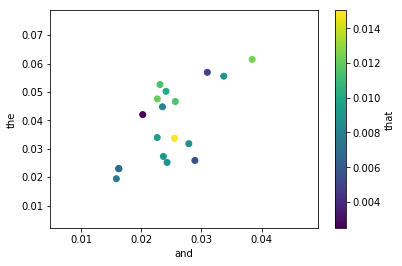

In [10]:
x,y=data['and'],data['the']
f=data['that']

#plt.plot(x,y,'o',color='black')
plt.scatter(x,y,c=f)
plt.xlabel('and')
plt.ylabel('the')
plt.colorbar(label='that')

In [11]:
data['label'] = 1
data

,and,the,that,of,was,upon,not,when,then,label
0,0.024279,0.025173,0.008990,0.022237,0.012394,0.000691,0.010918,0.001621,0.000780,1
1,0.027900,0.031781,0.008689,0.026118,0.013548,0.000652,0.009433,0.001997,0.000611,1
2,0.023662,0.027272,0.009161,0.025181,0.013039,0.000622,0.008561,0.001844,0.000890,1
3,0.038437,0.061448,0.012443,0.034117,0.004467,0.002701,0.006484,0.002459,0.000787,1
4,0.020230,0.042016,0.002514,0.015681,0.003591,0.001676,0.004429,0.001197,0.000838,1
5,0.033709,0.055541,0.008963,0.014416,0.012706,0.000846,0.003797,0.003186,0.001764,1
6,0.025523,0.033697,0.015029,0.017191,0.014449,0.000000,0.001160,0.003164,0.001793,1
7,0.023512,0.044767,0.008062,0.014658,0.010320,0.000762,0.003782,0.002023,0.002111,1
8,0.025651,0.046631,0.011547,0.026073,0.009506,0.000979,0.004938,0.001382,0.001247,1
9,0.024099,0.050207,0.010225,0.024250,0.013258,0.000302,0.003637,0.001522,0.001174,1


In [12]:
x_train=data.drop('label', axis =1)
x_train

,and,the,that,of,was,upon,not,when,then
0,0.024279,0.025173,0.008990,0.022237,0.012394,0.000691,0.010918,0.001621,0.000780
1,0.027900,0.031781,0.008689,0.026118,0.013548,0.000652,0.009433,0.001997,0.000611
2,0.023662,0.027272,0.009161,0.025181,0.013039,0.000622,0.008561,0.001844,0.000890
3,0.038437,0.061448,0.012443,0.034117,0.004467,0.002701,0.006484,0.002459,0.000787
4,0.020230,0.042016,0.002514,0.015681,0.003591,0.001676,0.004429,0.001197,0.000838
5,0.033709,0.055541,0.008963,0.014416,0.012706,0.000846,0.003797,0.003186,0.001764
6,0.025523,0.033697,0.015029,0.017191,0.014449,0.000000,0.001160,0.003164,0.001793
7,0.023512,0.044767,0.008062,0.014658,0.010320,0.000762,0.003782,0.002023,0.002111
8,0.025651,0.046631,0.011547,0.026073,0.009506,0.000979,0.004938,0.001382,0.001247
9,0.024099,0.050207,0.010225,0.024250,0.013258,0.000302,0.003637,0.001522,0.001174


In [13]:
y_train = data.label
y_train

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
Name: label, dtype: int64

In [14]:
X_train,X_test,y_train,y_test = train_test_split(x_train,y_train,test_size = 0.1, random_state = 666)
X_train

,and,the,that,of,was,upon,not,when,then
17,0.030972,0.056907,0.004971,0.026646,0.001130,0.000975,0.004913,0.000407,0.000594
7,0.023512,0.044767,0.008062,0.014658,0.010320,0.000762,0.003782,0.002023,0.002111
16,0.016249,0.022947,0.006828,0.013613,0.001513,0.000000,0.006698,0.000778,0.001556
5,0.033709,0.055541,0.008963,0.014416,0.012706,0.000846,0.003797,0.003186,0.001764
8,0.025651,0.046631,0.011547,0.026073,0.009506,0.000979,0.004938,0.001382,0.001247
15,0.016221,0.023019,0.006879,0.015418,0.002061,0.000000,0.007655,0.000723,0.002007
0,0.024279,0.025173,0.008990,0.022237,0.012394,0.000691,0.010918,0.001621,0.000780
1,0.027900,0.031781,0.008689,0.026118,0.013548,0.000652,0.009433,0.001997,0.000611
3,0.038437,0.061448,0.012443,0.034117,0.004467,0.002701,0.006484,0.002459,0.000787
4,0.020230,0.042016,0.002514,0.015681,0.003591,0.001676,0.004429,0.001197,0.000838


In [15]:
clf=DecisionTreeClassifier(random_state=0)
clf=clf.fit(X_train,y_train)
pred=clf.predict(X_test)
pred

array([1, 1], dtype=int64)

In [16]:
accuracy_score(pred, y_test)

1.0

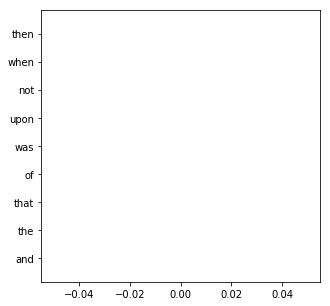

In [17]:
features=X_train.columns
importances=clf.feature_importances_
indices=np.argsort(importances)
importances,indices

plt.figure(figsize=(5,5))
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

In [18]:
#LDA

LDA = LinearDiscriminantAnalysis(n_components=4)
#LDA=LDA(n_components=2)
LDA.fit(X_train,y_train)

prediction= LDA.predict(X_test)
prediction
score = accuracy_score(prediction,y_test)
score

C:\Users\SI\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:402: RuntimeWarning: invalid value encountered in true_divide
  S**2))[:self._max_components]


1.0

In [19]:
#次元圧縮するバージョン

In [20]:
data_ =data.drop('label', axis =1)
data_

,and,the,that,of,was,upon,not,when,then
0,0.024279,0.025173,0.008990,0.022237,0.012394,0.000691,0.010918,0.001621,0.000780
1,0.027900,0.031781,0.008689,0.026118,0.013548,0.000652,0.009433,0.001997,0.000611
2,0.023662,0.027272,0.009161,0.025181,0.013039,0.000622,0.008561,0.001844,0.000890
3,0.038437,0.061448,0.012443,0.034117,0.004467,0.002701,0.006484,0.002459,0.000787
4,0.020230,0.042016,0.002514,0.015681,0.003591,0.001676,0.004429,0.001197,0.000838
5,0.033709,0.055541,0.008963,0.014416,0.012706,0.000846,0.003797,0.003186,0.001764
6,0.025523,0.033697,0.015029,0.017191,0.014449,0.000000,0.001160,0.003164,0.001793
7,0.023512,0.044767,0.008062,0.014658,0.010320,0.000762,0.003782,0.002023,0.002111
8,0.025651,0.046631,0.011547,0.026073,0.009506,0.000979,0.004938,0.001382,0.001247
9,0.024099,0.050207,0.010225,0.024250,0.013258,0.000302,0.003637,0.001522,0.001174


(18,) (18, 10)
datanp:(18, 11)
X_train:(12, 9)
Y_train:(12,)
pca.singular_values_:[0.04998343 0.02112143 0.01540826]
pca.explained_variance_ratio_:[0.73925677 0.13200481 0.07025064]
pca_MEAN:[0.02448659 0.03659634 0.00918241 0.02163987 0.00807298 0.00082094
 0.00637716 0.00178671 0.00143351]
pca_X:[[ 0.0111745  -0.00024009 -0.00201425]
 [-0.01713825  0.00562673  0.00070796]
 [-0.01018235 -0.00769947  0.00055428]
 [-0.00185731 -0.0090763   0.00134046]
 [ 0.03032172 -0.00135592  0.00844679]
 [ 0.00090736  0.01129086 -0.00083945]
 [ 0.01345267  0.00072658 -0.00646061]
 [-0.0023912  -0.00394558 -0.00669735]
 [-0.02131004  0.00487404  0.00066577]
 [-0.01109925  0.00233886  0.00791679]
 [-0.0072395  -0.00815704 -0.00070734]
 [ 0.01536166  0.00561733 -0.00291305]]


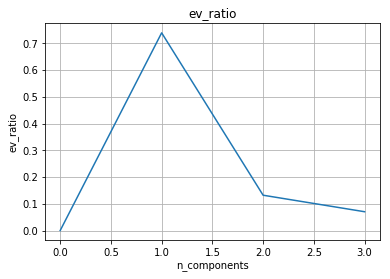

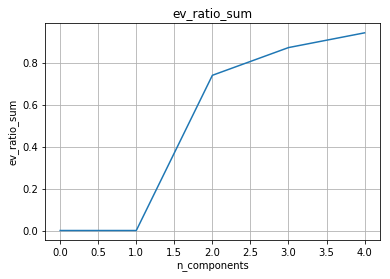

array([0.        , 0.73925677, 0.13200481, 0.07025064])

In [21]:
#PCA
label=data.label
print(label.shape, data.shape)
data_ =data.drop('label', axis =1)
data_

X_train,x_test,Y_train,y_test=train_test_split(data_, label , test_size = 0.3, random_state = 666)
#datanp=data.values
#datanp.shape
#datanp
pca=PCA(n_components=3)
pca.fit(X_train)
pca_X=pca.transform(X_train)

print("datanp:"+ str(datanp.shape))
print("X_train:"+ str(X_train.shape))
print("Y_train:"+ str(Y_train.shape))

print("pca.singular_values_:"+ str(pca.singular_values_))
print("pca.explained_variance_ratio_:"+ str(pca.explained_variance_ratio_))
print("pca_MEAN:"+ str(pca.mean_))
print("pca_X:"+ str(pca_X))

ev_ratio = pca.explained_variance_ratio_
ev_ratio
ev_ratio = np.hstack([0,ev_ratio])
plt.title("ev_ratio")
plt.plot(ev_ratio)
plt.grid(True)
plt.xlabel('n_components')
plt.ylabel('ev_ratio')
plt.show()
#plt.figure(figsize=(30,30))

ev_ratio_sum = np.hstack([0,ev_ratio.cumsum()])
plt.title("ev_ratio_sum")
plt.plot(ev_ratio_sum)
plt.grid(True)
plt.xlabel('n_components')
plt.ylabel('ev_ratio_sum')
plt.show()
#plt.figure(figsize=(30,30))

ev_ratio

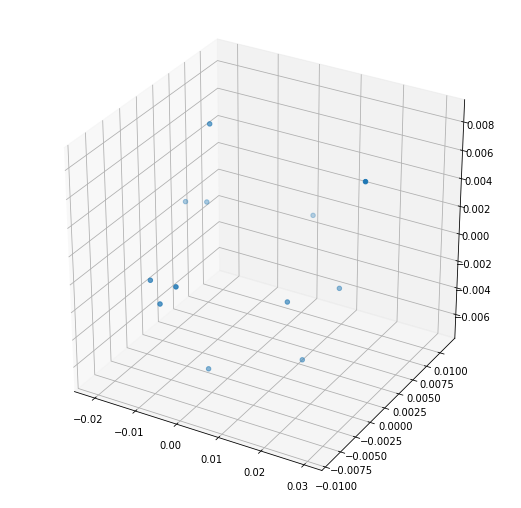

In [22]:

fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(221,projection='3d')
#ax2=fig.add_subplot(222)

#color=['red','green','blue']
#ax1.scatter3D(X[:,0],X[:,1],X[:,2])
ax1.scatter3D(pca_X[:,0],pca_X[:,1],pca_X[:,2])
#ax2.scatter(pca_X[:,0],pca_X[:,1])

plt.show()

In [23]:
#次元圧縮しないバージョン

X_train:(12, 9)
Y_train:(12,)
pca.singular_values_:[0.04998343 0.02112143 0.01540826 0.01124974 0.00772108 0.00285771
 0.00148715 0.00101092 0.00029941]
pca.explained_variance_ratio_:[7.39256767e-01 1.32004811e-01 7.02506445e-02 3.74479582e-02
 1.76400218e-02 2.41645791e-03 6.54414411e-04 3.02399377e-04
 2.65265644e-05]
pca_MEAN:[0.02448659 0.03659634 0.00918241 0.02163987 0.00807298 0.00082094
 0.00637716 0.00178671 0.00143351]
pca_X:[[ 1.11744964e-02 -2.40091648e-04 -2.01425017e-03 -8.79386857e-04
  -1.06021023e-03  6.86457801e-04  4.13479004e-04  2.91158074e-04
   1.67760492e-04]
 [-1.71382502e-02  5.62673373e-03  7.07964571e-04 -2.20284879e-03
  -2.08860521e-03  1.11167855e-03  2.84115574e-04  4.22239779e-04
  -9.39220705e-05]
 [-1.01823480e-02 -7.69946915e-03  5.54278398e-04 -2.16597428e-03
   7.96785137e-04 -1.39209856e-03 -7.43612503e-05  3.77252399e-04
   1.11945047e-04]
 [-1.85731088e-03 -9.07630350e-03  1.34045918e-03 -1.74147832e-03
   2.10656182e-03 -1.70082340e-04  1.74010

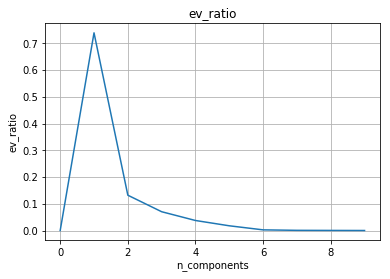

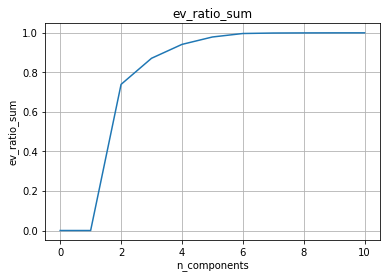

array([0.00000000e+00, 7.39256767e-01, 1.32004811e-01, 7.02506445e-02,
       3.74479582e-02, 1.76400218e-02, 2.41645791e-03, 6.54414411e-04,
       3.02399377e-04, 2.65265644e-05])

In [24]:
#PCA


#X_train,x_test,Y_train,y_test=train_test_split(datanp,label , test_size = 0.3, random_state = 666)
#datanp=data.values
#datanp.shape
#datanp


pca=PCA()
pca.fit(X_train)

pca_X=pca.transform(X_train)

#print("datanp:"+ str(datanp.shape))
print("X_train:"+ str(X_train.shape))
print("Y_train:"+ str(Y_train.shape))

print("pca.singular_values_:"+ str(pca.singular_values_))
print("pca.explained_variance_ratio_:"+ str(pca.explained_variance_ratio_))
print("pca_MEAN:"+ str(pca.mean_))
print("pca_X:"+ str(pca_X))

ev_ratio = pca.explained_variance_ratio_
ev_ratio
ev_ratio = np.hstack([0,ev_ratio])
plt.title("ev_ratio")
plt.plot(ev_ratio)
plt.grid(True)
plt.xlabel('n_components')
plt.ylabel('ev_ratio')
plt.show()
#plt.figure(figsize=(30,30))

ev_ratio_sum = np.hstack([0,ev_ratio.cumsum()])
plt.title("ev_ratio_sum")
plt.plot(ev_ratio_sum)
plt.grid(True)
plt.xlabel('n_components')
plt.ylabel('ev_ratio_sum')
plt.show()
#plt.figure(figsize=(30,30))

ev_ratio

In [25]:
data_features= data_.columns
data_features

Index(['and', 'the', 'that', 'of', 'was', 'upon', 'not', 'when', 'then'], dtype='object')

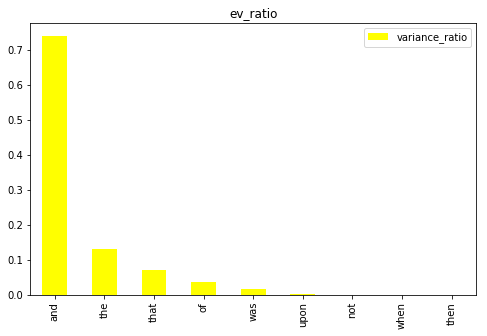

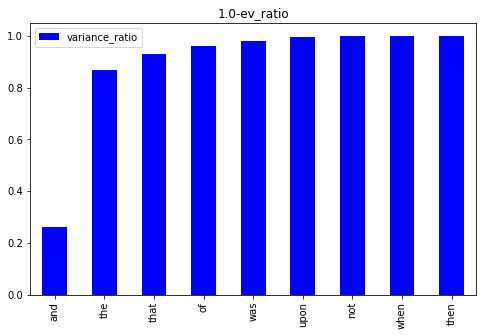

In [26]:
index=[0]
ev_ratio_array= np.delete(ev_ratio,index)

variance_ratio = pd.DataFrame(ev_ratio_array,index=data_features, columns=["variance_ratio"])

variance_ratio.plot.bar(figsize=(8, 5), color='yellow')
plt.title("ev_ratio")
groupin_variance_ratio=1.0-variance_ratio

groupin_variance_ratio.plot.bar(figsize=(8, 5), color='blue')
plt.title("1.0-ev_ratio")
plt.savefig('figure.png')

In [27]:
variance_ratio

,variance_ratio
and,0.739257
the,0.132005
that,0.070251
of,0.037448
was,0.017640
upon,0.002416
not,0.000654
when,0.000302
then,0.000027


In [28]:
groupin_variance_ratio

,variance_ratio
and,0.260743
the,0.867995
that,0.929749
of,0.962552
was,0.982360
upon,0.997584
not,0.999346
when,0.999698
then,0.999973


In [29]:
groupin_variance_ratio.sort_values('variance_ratio', ascending=False)

,variance_ratio
then,0.999973
when,0.999698
not,0.999346
upon,0.997584
was,0.982360
of,0.962552
that,0.929749
the,0.867995
and,0.260743


In [30]:
pca=PCA(n_components=3)
lr = LogisticRegression()
X_trainnp= pca_X

lr.fit(X_train, Y_train)
X_train.shape,Y_train.shape
X_train

C:\Users\SI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
prediction= lr.predict(x_test)
prediction
score = accuracy_score(prediction,y_test)
score

In [ ]:
X=datanp
fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(221,projection='3d')
#ax2=fig.add_subplot(222)

#color=['red','green','blue']
#ax1.scatter3D(X[:,0],X[:,1],X[:,2])
ax1.scatter3D(pca_X[:,0],pca_X[:,1],pca_X[:,2])
#ax2.scatter(pca_X[:,0],pca_X[:,1])

plt.show()

# VAL

In [ ]:
data_val

In [ ]:
data_val = data_val.drop(data_val.columns[0],axis=1)
#data_val = data_val.drop(data_val.columns[0],axis=1)
data_val

In [ ]:
data_val.columns[0], data_val.columns

In [ ]:
data_val = data_val.drop(data_val.columns[0],axis=1)
#data_val = data_val.drop(data_val.columns[0],axis=1)
data_val

In [ ]:
x_train

In [ ]:
pred=clf.predict(data_val)
pred

In [ ]:
features=X_train.columns
importances=clf.feature_importances_
indices=np.argsort(importances)
importances,indices

plt.figure(figsize=(5,5))
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

In [ ]:
importances=clf.feature_importances_
indices=np.argsort(importances)
importances,indices

In [ ]:
plt.figure(figsize=(5,5))
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()